# Coleta dos dados 
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes. 

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv. 

# Coletando dados de estados brasileiros

In [311]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo 
estados = pd.read_csv('./dataset/estado_regiao.csv', sep = ';', encoding='latin-1')

In [312]:
estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


# Coletando dados de Pacientes

In [313]:
pacientes = pd.read_csv('./dataset/dados_pacientes.csv', sep=';', encoding='utf-8')
pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


# Coletando dados Clínicos

In [314]:
clinicos = pd.read_csv('./dataset/dados_clinicos.csv', sep = ';', encoding='latin-1')
clinicos.head()

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


# Analisando as variáveis da base de dados

In [315]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7999 non-null   int64  
 1   idade            7999 non-null   int64  
 2   classe_trabalho  7612 non-null   object 
 3   escolaridade     7999 non-null   object 
 4   id_estado        7999 non-null   int64  
 5   estado_civil     7999 non-null   object 
 6   raca             7999 non-null   object 
 7   qtde_filhos      7989 non-null   float64
 8   salario          7999 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 562.6+ KB


In [316]:
pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [317]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [318]:
clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [319]:
clinicos.describe()

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


#Analisando duplicados

In [320]:
# Selecionar colunas relevantes para verificar duplicatas
clinicos_check_duplicates = ['id_cliente', 'peso', 'colesterol', 'genero']

# Contar linhas duplicadas
qtd_duplicadas = clinicos.duplicated(subset=clinicos_check_duplicates).sum()
print(f'Quantidade de linhas duplicadas - Clínicos: {qtd_duplicadas}')

# Identificar e mostrar as linhas duplicadas
linhas_duplicadas = clinicos[clinicos.duplicated(subset=clinicos_check_duplicates, keep=False)]
print('Linhas Duplicadas:')
print(linhas_duplicadas)

Quantidade de linhas duplicadas - Clínicos: 43
Linhas Duplicadas:
     id_cliente   peso  colesterol     genero
349         350  134.0         163  Masculino
350         351  199.0         232  Masculino
351         352  115.0         131  Masculino
352         353  149.0         184   Feminino
353         354  192.0         225   Feminino
..          ...    ...         ...        ...
585         363  172.0         211  Masculino
586         364  157.0         194   Feminino
587         365  137.0         169   Feminino
588         366  158.0         189   Feminino
589         367  110.0         128   Feminino

[86 rows x 4 columns]


In [321]:
# Selecionar colunas relevantes para verificar duplicatas
pacientes_check_duplicates = ['id_cliente', 'idade', 'classe_trabalho', 'escolaridade', 'id_estado', 'estado_civil', 'raca', 'qtde_filhos', 'salario']

# Contar linhas duplicadas
qtd_duplicadas = pacientes.duplicated(subset=pacientes_check_duplicates).sum()
print(f'Quantidade de linhas duplicadas - Pacientes: {qtd_duplicadas}')

# Identificar e mostrar as linhas duplicadas
linhas_duplicadas = pacientes[pacientes.duplicated(subset=pacientes_check_duplicates, keep=False)]
print('Linhas Duplicadas:')
print(linhas_duplicadas)

Quantidade de linhas duplicadas - Pacientes: 0
Linhas Duplicadas:
Empty DataFrame
Columns: [id_cliente, idade, classe_trabalho, escolaridade, id_estado, estado_civil, raca, qtde_filhos, salario]
Index: []


In [322]:
# Selecionar colunas relevantes para verificar duplicatas
estados_check_duplicates = ['id_estado', 'sigla', 'estado', 'regiao', 'pais']

# Contar linhas duplicadas
qtd_duplicadas = estados.duplicated(subset=estados_check_duplicates).sum()
print(f'Quantidade de linhas duplicadas - Estados: {qtd_duplicadas}')

# Identificar e mostrar as linhas duplicadas
linhas_duplicadas = estados[estados.duplicated(subset=estados_check_duplicates, keep=False)]
print('Linhas Duplicadas:')
print(linhas_duplicadas)

Quantidade de linhas duplicadas - Estados: 0
Linhas Duplicadas:
Empty DataFrame
Columns: [id_estado, sigla, estado, regiao, pais]
Index: []


In [323]:
clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [324]:
# Remover dados duplicados da dataset Clínicos
clinicos = clinicos.drop_duplicates(subset=['id_cliente', 'peso', 'colesterol', 'genero'])

#Analisando dados ausentes

In [325]:
clinicos.isna().sum()

# Solução: Peso - excluir os registros ausentes de Peso

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

In [326]:
# Verificando valores ausentes/nulos na base
pacientes.isna().sum()

# classe_trabalho - Solução: moda da variável analisada.
# qtde_filhos - Solução: qtde_filhos - média arredondada

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

In [327]:
estados.isna().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

In [328]:
# Verificando os registros com valores nulos
pacientes.loc[pacientes['classe_trabalho'].isnull()]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
61,62,32,NaN,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100
69,70,25,NaN,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450
127,128,35,NaN,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100
148,149,43,NaN,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490
153,154,52,NaN,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100
...,...,...,...,...,...,...,...,...,...
7931,7932,51,NaN,Ensino Médio Completo,4,Divorciado,Branco,2.0,2660
7952,7953,19,NaN,Ensino Médio Completo,1,Solteiro,Branco,0.0,2581
7960,7961,30,NaN,Ensino Fundamental Completo,10,Solteiro,Branco,4.0,1100
7988,7989,20,NaN,Ensino Médio Completo,1,Solteiro,Branco,2.0,3610


In [329]:
# Verificando os registros com valores nulos
pacientes.loc[pacientes['qtde_filhos'].isnull()]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
12,13,23,Funcionário Setor Privado,Pós-Graduado,22,Solteiro,Branco,NaN,5316
20,21,40,Funcionário Setor Privado,Doutorado,8,Casado,Branco,NaN,12535
189,190,38,Funcionário Setor Privado,Ensino Médio Completo,27,Divorciado,Negro,NaN,2369
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,NaN,10671
295,296,37,MEI,Ensino Médio Completo,18,Divorciado,Branco,NaN,4300
358,359,26,Autônomo,Ensino Fundamental Completo,24,Casado,Branco,NaN,1100
359,360,36,Funcionário Setor Privado,Ensino Fundamental Completo,11,Casado,Branco,NaN,1100
360,361,62,Funcionário Setor Privado,Mestrado,7,Casado,Branco,NaN,6072
362,363,43,Funcionário Setor Privado,Ensino Médio Completo,12,Divorciado,Branco,NaN,2240
402,403,28,Funcionário Setor Privado,Ensino Fundamental Incompleto,27,Casado,Amarelo,NaN,1100


# Substituindo variável categórica (moda) e numérica (média)

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

Temos 3 opções para tratamento de dados númericos. 

1. Eliminação dos registros
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor cetral dos dados) 



In [330]:
# dataset Paciente - Média Arredondada para a variável qtde_filhos
media_paciente = pacientes['qtde_filhos'].median()
media_paciente

2.0

In [331]:
# Preencher os valores nulos na coluna 'qtde_filhos' ausentes com o valor da média arredondada

#pacientes['qtde_filhos'].fillna(pacientes['qtde_filhos'].mean().round(2), inplace=True)
pacientes['qtde_filhos'] = pacientes['qtde_filhos'].fillna(pacientes['qtde_filhos'].mean().round(2))

In [332]:
# Confirmando a mudança - Sem valores nulos na coluna 'qtde_filhos'
pacientes.loc[pacientes['qtde_filhos'].isnull()]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario


In [333]:
# dataset Paciente - Moda da variável 'classe_trabalho'

# Calcular a moda da coluna 'classe_trabalho'
moda_classe_trabalho = pacientes['classe_trabalho'].mode()[0]
moda_classe_trabalho

'Funcionário Setor Privado'

In [334]:
# Preencher os valores nulos na coluna 'classe_trabalho' com a moda - 'Funcionário Setor Privado'
#pacientes['classe_trabalho'].fillna(moda_classe_trabalho, inplace=True)

pacientes['classe_trabalho'] = pacientes['classe_trabalho'].fillna(moda_classe_trabalho)

In [335]:
# Confirmando a mudança - Sem valores nulos na coluna 'classe_trabalho' 
pacientes.loc[pacientes['classe_trabalho'].isnull()]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario


In [336]:
# Verificando os registros com valores nulos
clinicos.loc[clinicos['peso'].isnull()]

,id_cliente,peso,colesterol,genero
63,64,NaN,211,Masculino
101,102,NaN,230,Feminino
146,147,NaN,171,Masculino
195,196,NaN,143,Feminino
215,216,NaN,180,Masculino


# Eliminando dados ausentes

In [337]:
#Dados Ausentes - Removendo as linhas com registros de peso ausente
clinicos.dropna(subset=['peso'], inplace=True) 

# para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [338]:
clinicos.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
dtype: int64

# Analisando distribuição dos dados


In [339]:
import matplotlib.pyplot as plt


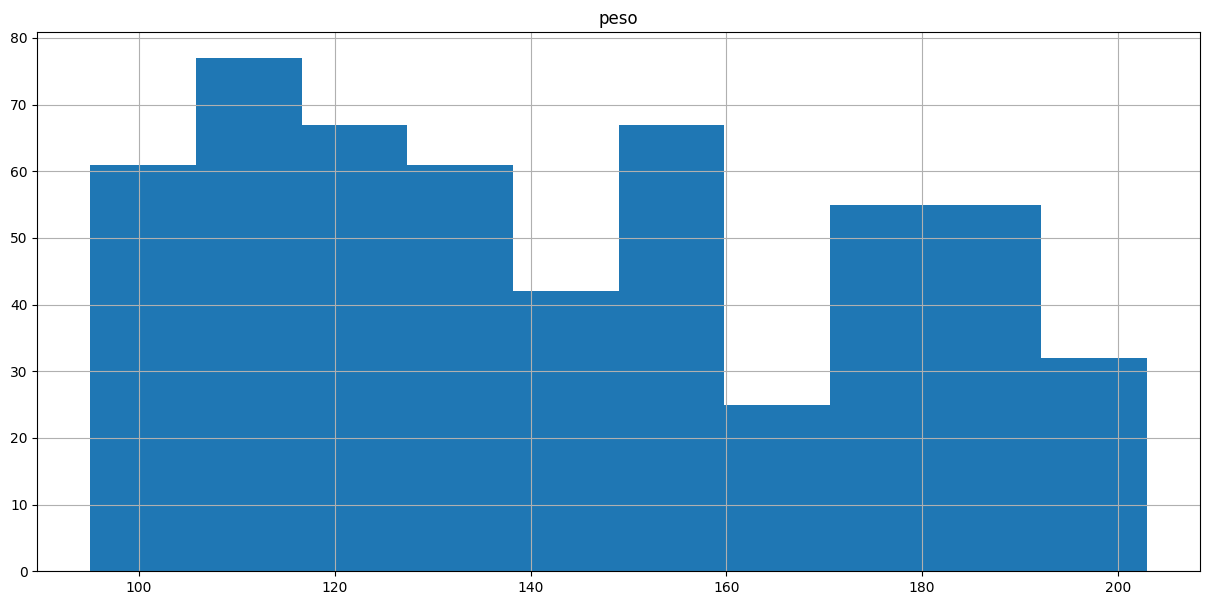

In [340]:
clinicos.hist(column='peso', figsize=(15,7))
plt.show()

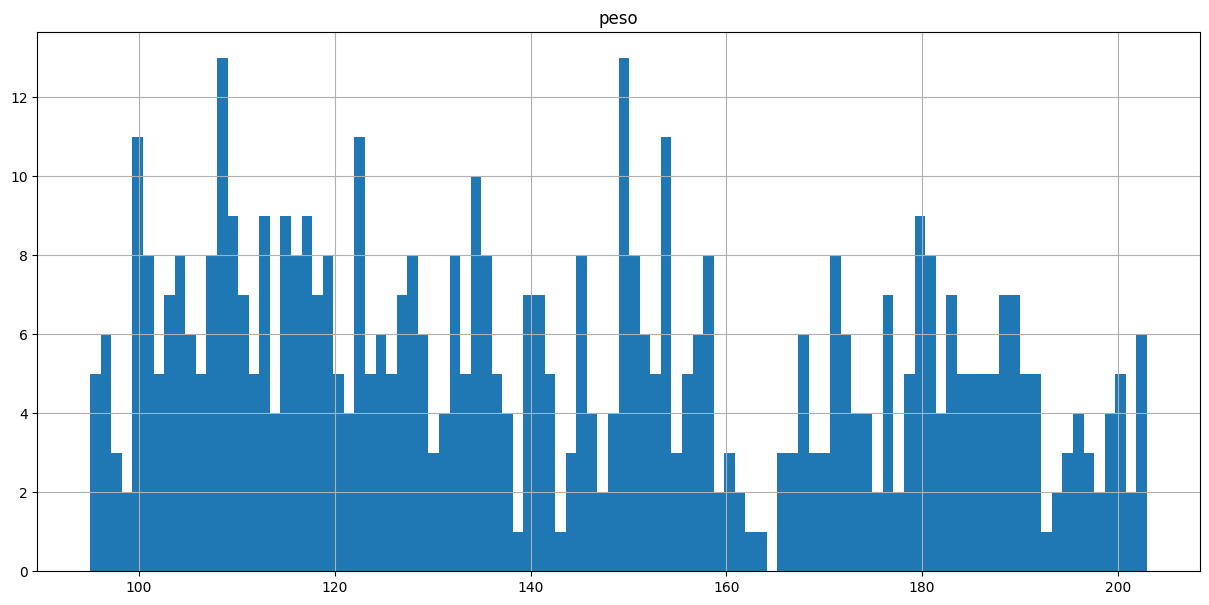

In [341]:
clinicos.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

array([[<Axes: title={'center': 'colesterol'}>]], dtype=object)

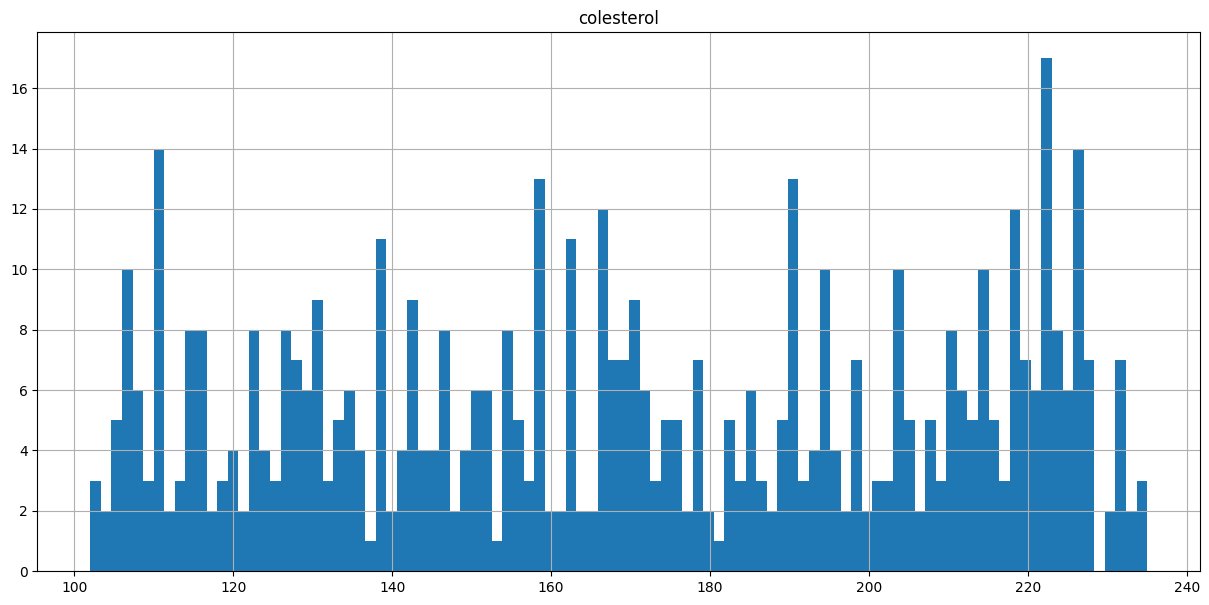

In [342]:
clinicos.hist(column='colesterol', figsize=(15,7), bins=100)

In [343]:
clinicos

# Coluna 'genero' é categórica e preciso ajustar para trabalhar com os algoritmos

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino
...,...,...,...,...
542,543,172.0,207,Masculino
543,544,129.0,157,Masculino
544,545,107.0,115,Masculino
545,546,117.0,147,Masculino


In [344]:
#Criando um Identificador para a variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clinicos['genero_number'] = LE.fit_transform(clinicos['genero'])

In [345]:
clinicos

,id_cliente,peso,colesterol,genero,genero_number
0,1,102.0,111,Masculino,1
1,2,115.0,135,Masculino,1
2,3,115.0,136,Masculino,1
3,4,140.0,167,Feminino,0
4,5,130.0,158,Masculino,1
...,...,...,...,...,...
542,543,172.0,207,Masculino,1
543,544,129.0,157,Masculino,1
544,545,107.0,115,Masculino,1
545,546,117.0,147,Masculino,1


array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

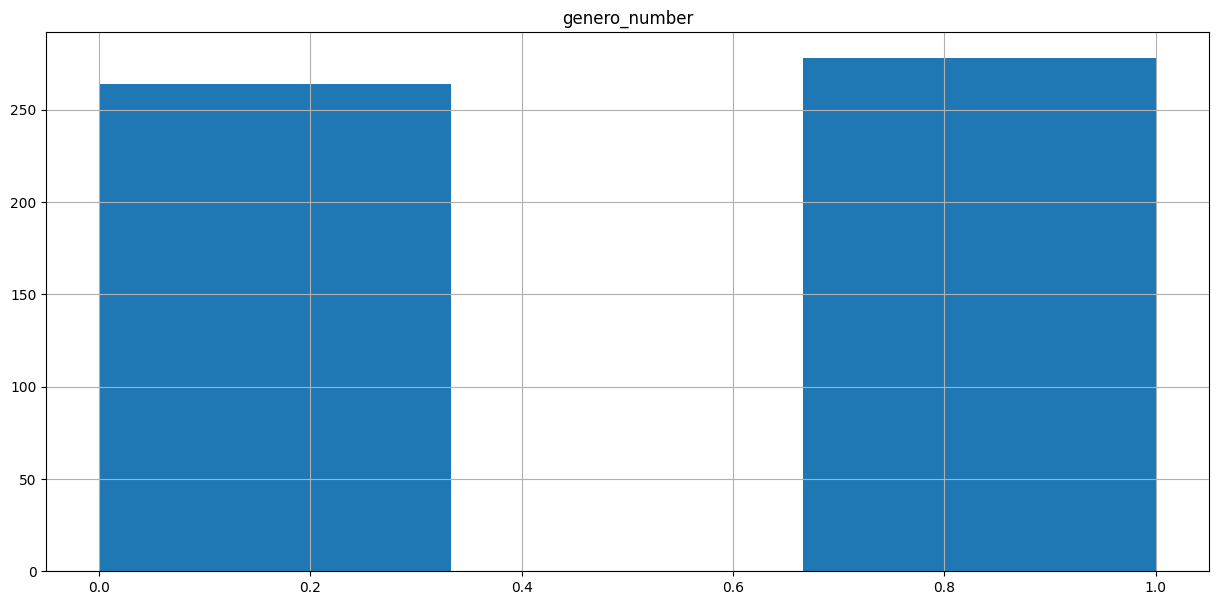

In [346]:
clinicos.hist(column='genero_number', figsize=(15,7), bins=3 )

# Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta



In [347]:
estados[:5]

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [348]:
pacientes[:5]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [349]:
pacientes_estados = pd.merge(pacientes, estados, on='id_estado')
pacientes_estados.sort_values('id_cliente')

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856,DF,Distrito Federal,Centro-Oeste,Brasil
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil
7996,7997,44,Funcionário Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729,RR,Roraima,Norte,Brasil
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100,ES,Espírito Santo,Sudeste,Brasil


In [350]:
clinicos[:5]

,id_cliente,peso,colesterol,genero,genero_number
0,1,102.0,111,Masculino,1
1,2,115.0,135,Masculino,1
2,3,115.0,136,Masculino,1
3,4,140.0,167,Feminino,0
4,5,130.0,158,Masculino,1


In [351]:
#realiza Junção entre clinicos e pacientes_estados
base_completa = pd.merge(pacientes_estados, clinicos, on='id_cliente').sort_values('id_cliente')

In [352]:
base_completa

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero,genero_number
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil,102.0,111,Masculino,1
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil,115.0,135,Masculino,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil,115.0,136,Masculino,1
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil,140.0,167,Feminino,0
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil,130.0,158,Masculino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,9,Divorciado,Branco,1.0,3533,GO,Goiás,Centro-Oeste,Brasil,172.0,207,Masculino,1
538,544,36,Autônomo,Ensino Médio Incompleto,5,Separado,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil,129.0,157,Masculino,1
539,545,72,Aposentado,Ensino Médio Incompleto,1,Viúvo,Branco,1.0,4110,AC,Acre,Norte,Brasil,107.0,115,Masculino,1
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,5,Casado,Negro,2.0,1100,BA,Bahia,Nordeste,Brasil,117.0,147,Masculino,1


In [353]:
base_completa.reset_index(drop=True)

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero,genero_number
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil,102.0,111,Masculino,1
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil,115.0,135,Masculino,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil,115.0,136,Masculino,1
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil,140.0,167,Feminino,0
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil,130.0,158,Masculino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,9,Divorciado,Branco,1.0,3533,GO,Goiás,Centro-Oeste,Brasil,172.0,207,Masculino,1
538,544,36,Autônomo,Ensino Médio Incompleto,5,Separado,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil,129.0,157,Masculino,1
539,545,72,Aposentado,Ensino Médio Incompleto,1,Viúvo,Branco,1.0,4110,AC,Acre,Norte,Brasil,107.0,115,Masculino,1
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,5,Casado,Negro,2.0,1100,BA,Bahia,Nordeste,Brasil,117.0,147,Masculino,1


# Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [354]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero,cod_genero
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil,102.0,111,Masculino,1
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil,115.0,135,Masculino,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil,115.0,136,Masculino,1
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil,140.0,167,Feminino,0
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil,130.0,158,Masculino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,9,Divorciado,Branco,1.0,3533,GO,Goiás,Centro-Oeste,Brasil,172.0,207,Masculino,1
538,544,36,Autônomo,Ensino Médio Incompleto,5,Separado,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil,129.0,157,Masculino,1
539,545,72,Aposentado,Ensino Médio Incompleto,1,Viúvo,Branco,1.0,4110,AC,Acre,Norte,Brasil,107.0,115,Masculino,1
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,5,Casado,Negro,2.0,1100,BA,Bahia,Nordeste,Brasil,117.0,147,Masculino,1


In [355]:
base_completa

,cod_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero,cod_genero
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil,102.0,111,Masculino,1
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil,115.0,135,Masculino,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil,115.0,136,Masculino,1
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil,140.0,167,Feminino,0
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil,130.0,158,Masculino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,9,Divorciado,Branco,1.0,3533,GO,Goiás,Centro-Oeste,Brasil,172.0,207,Masculino,1
538,544,36,Autônomo,Ensino Médio Incompleto,5,Separado,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil,129.0,157,Masculino,1
539,545,72,Aposentado,Ensino Médio Incompleto,1,Viúvo,Branco,1.0,4110,AC,Acre,Norte,Brasil,107.0,115,Masculino,1
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,5,Casado,Negro,2.0,1100,BA,Bahia,Nordeste,Brasil,117.0,147,Masculino,1


# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.

In [356]:
base_completa[['cod_cliente', 'genero', 'classe_trabalho','escolaridade', 'salario','idade', 'peso', 'colesterol' ,'id_estado', 'sigla', 'estado', 'regiao', 'pais' ]]

,cod_cliente,genero,classe_trabalho,escolaridade,salario,idade,peso,colesterol,id_estado,sigla,estado,regiao,pais
0,1,Masculino,Servidor Público,Ensino Médio Completo,4754,39,102.0,111,2,AL,Alagoas,Nordeste,Brasil
1,2,Masculino,Autônomo,Superior Incompleto,3923,50,115.0,135,24,SC,Santa Catarina,Sul,Brasil
2,3,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,38,115.0,136,4,AM,Amazonas,Norte,Brasil
3,4,Feminino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,53,140.0,167,24,SC,Santa Catarina,Sul,Brasil
4,5,Masculino,Funcionário Setor Privado,Ensino Médio Completo,3430,28,130.0,158,15,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,Autônomo,Ensino Médio Completo,3533,46,172.0,207,9,GO,Goiás,Centro-Oeste,Brasil
538,544,Masculino,Autônomo,Ensino Médio Incompleto,1100,36,129.0,157,5,BA,Bahia,Nordeste,Brasil
539,545,Masculino,Aposentado,Ensino Médio Incompleto,4110,72,107.0,115,1,AC,Acre,Norte,Brasil
540,546,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,35,117.0,147,5,BA,Bahia,Nordeste,Brasil


In [357]:
base_completa = base_completa[['cod_cliente', 'genero', 'classe_trabalho','escolaridade', 'salario','idade', 'peso', 'colesterol' ,'id_estado', 'sigla', 'estado', 'regiao', 'pais' ]].reset_index(drop=True)

In [358]:
base_completa

,cod_cliente,genero,classe_trabalho,escolaridade,salario,idade,peso,colesterol,id_estado,sigla,estado,regiao,pais
0,1,Masculino,Servidor Público,Ensino Médio Completo,4754,39,102.0,111,2,AL,Alagoas,Nordeste,Brasil
1,2,Masculino,Autônomo,Superior Incompleto,3923,50,115.0,135,24,SC,Santa Catarina,Sul,Brasil
2,3,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,38,115.0,136,4,AM,Amazonas,Norte,Brasil
3,4,Feminino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,53,140.0,167,24,SC,Santa Catarina,Sul,Brasil
4,5,Masculino,Funcionário Setor Privado,Ensino Médio Completo,3430,28,130.0,158,15,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,Autônomo,Ensino Médio Completo,3533,46,172.0,207,9,GO,Goiás,Centro-Oeste,Brasil
538,544,Masculino,Autônomo,Ensino Médio Incompleto,1100,36,129.0,157,5,BA,Bahia,Nordeste,Brasil
539,545,Masculino,Aposentado,Ensino Médio Incompleto,4110,72,107.0,115,1,AC,Acre,Norte,Brasil
540,546,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,35,117.0,147,5,BA,Bahia,Nordeste,Brasil


<h4>Analise do dataset</h4>

In [359]:
# Entre os estados da região Nordeste, qual se destaca pelo maior valor na média das idades?
# Calcular a média das idades para cada estado
# Filtrar os estados da região Nordeste
nordeste = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']
dados_nordeste = base_completa[base_completa['regiao'] == 'Nordeste']

# Calcular a média das idades para cada estado
media_idades_por_estado = dados_nordeste.groupby('id_estado').agg({'idade': 'mean', 'sigla': 'first'})


# Encontrar o estado com a maior média de idade
estado_destaque = media_idades_por_estado['idade'].idxmax()
media_maior_idade = media_idades_por_estado['idade'].max()
sigla_estado_destaque = media_idades_por_estado.loc[estado_destaque, 'sigla']

# Exibir o resultado
print(f"O estado da região Nordeste que se destaca pelo maior valor na média das idades é {estado_destaque} ({sigla_estado_destaque}) com média de idade {media_maior_idade:.2f}.")



O estado da região Nordeste que se destaca pelo maior valor na média das idades é 6 (CE) com média de idade 42.72.


In [360]:
# Entre todos os estados, qual deles apresenta o maior número de pacientes com grau de escolaridade 'Mestrado'?"

# Filtrar pacientes com grau de escolaridade 'Mestrado'
mestrado_pacientes = base_completa[base_completa['escolaridade'] == 'Mestrado']

# Contar o número de pacientes com grau de escolaridade 'Mestrado' por estado
contagem_mestrado_por_estado = mestrado_pacientes.groupby('id_estado').size()

# Encontrar o estado com o maior número de pacientes com grau de escolaridade 'Mestrado'
estado_maior_mestrado = contagem_mestrado_por_estado.idxmax()
qtd_maior_mestrado = contagem_mestrado_por_estado.max()
sigla_estado_maior_mestrado = base_completa.loc[base_completa['id_estado'] == estado_maior_mestrado, 'sigla'].iloc[0]

# Exibir o resultado
print(f"O estado que apresenta o maior número de pacientes com grau de escolaridade 'Mestrado' é {estado_maior_mestrado} ({sigla_estado_maior_mestrado}) com {qtd_maior_mestrado} pacientes.")


O estado que apresenta o maior número de pacientes com grau de escolaridade 'Mestrado' é 24 (SC) com 5 pacientes.


# Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

#Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [361]:
from sklearn.cluster import KMeans

In [362]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [363]:
dados_cliente = base_completa[['peso', 'colesterol','idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,39
1,115.0,135,50
2,115.0,136,38
3,140.0,167,53
4,130.0,158,28


In [364]:
wcss_clientes = calcular_wcss(dados_cliente)

In [386]:
wcss_clientes

[1444042.953874539,
 425262.66207976267,
 237415.05301877917,
 178274.29070661237,
 151368.41562544124,
 136415.53021370346,
 119901.25069697856,
 108825.99693141753,
 92495.94345437452,
 79317.2445985859]

In [365]:
type(wcss_clientes)

list

In [366]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1444042.953874539
O cluster 1 possui valor de WCSS de: 425262.66207976267
O cluster 2 possui valor de WCSS de: 237415.05301877917
O cluster 3 possui valor de WCSS de: 178274.29070661237
O cluster 4 possui valor de WCSS de: 151368.41562544124
O cluster 5 possui valor de WCSS de: 136415.53021370346
O cluster 6 possui valor de WCSS de: 119901.25069697856
O cluster 7 possui valor de WCSS de: 108825.99693141753
O cluster 8 possui valor de WCSS de: 92495.94345437452
O cluster 9 possui valor de WCSS de: 79317.2445985859


# Visualizando o gráfico do cotovelo

In [367]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [368]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()



In [369]:
kmeans_clientes = KMeans(n_clusters=3, random_state=42, n_init=10)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

# Utilize k-means = 3, Random state = 42, i_init=10

In [370]:
base_completa

,cod_cliente,genero,classe_trabalho,escolaridade,salario,idade,peso,colesterol,id_estado,sigla,estado,regiao,pais,cluster
0,1,Masculino,Servidor Público,Ensino Médio Completo,4754,39,102.0,111,2,AL,Alagoas,Nordeste,Brasil,0
1,2,Masculino,Autônomo,Superior Incompleto,3923,50,115.0,135,24,SC,Santa Catarina,Sul,Brasil,0
2,3,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,38,115.0,136,4,AM,Amazonas,Norte,Brasil,0
3,4,Feminino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,53,140.0,167,24,SC,Santa Catarina,Sul,Brasil,2
4,5,Masculino,Funcionário Setor Privado,Ensino Médio Completo,3430,28,130.0,158,15,PB,Paraíba,Nordeste,Brasil,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,Autônomo,Ensino Médio Completo,3533,46,172.0,207,9,GO,Goiás,Centro-Oeste,Brasil,1
538,544,Masculino,Autônomo,Ensino Médio Incompleto,1100,36,129.0,157,5,BA,Bahia,Nordeste,Brasil,2
539,545,Masculino,Aposentado,Ensino Médio Incompleto,4110,72,107.0,115,1,AC,Acre,Norte,Brasil,0
540,546,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,35,117.0,147,5,BA,Bahia,Nordeste,Brasil,0


# Calcula os centroides de cada cluster

In [371]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[110.4       , 125.88947368,  38.64210526],
       [182.18934911, 217.        ,  38.14792899],
       [141.96174863, 173.22404372,  37.21857923]])

In [372]:
dados_cliente

,peso,colesterol,idade
0,102.0,111,39
1,115.0,135,50
2,115.0,136,38
3,140.0,167,53
4,130.0,158,28
...,...,...,...
537,172.0,207,46
538,129.0,157,36
539,107.0,115,72
540,117.0,147,35


Aqui temos os centroides dos 3 cluster de acordo com os atributos. 
Nesse exemplo vemos os centroides de 'peso', 'colesterol','idade' respectivamente.

In [373]:
grafico = px.scatter(x = base_completa['peso'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# Visualizando e alterando layout do gráfico

In [374]:
grafico = px.scatter(x = base_completa['colesterol'], 
                     y = base_completa['peso'], 
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',                  
                  ) 


fig.show()

# Criando Função para Gerar gráficos

In [375]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

In [376]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [377]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [378]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos




In [379]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)


In [380]:
cluster_clientes = base_completa

In [381]:
# Seguimentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Risco Moderado'

In [382]:
cluster_clientes

,cod_cliente,genero,classe_trabalho,escolaridade,salario,idade,peso,colesterol,id_estado,sigla,estado,regiao,pais,cluster,nome_cluster
0,1,Masculino,Servidor Público,Ensino Médio Completo,4754,39,102.0,111,2,AL,Alagoas,Nordeste,Brasil,0,Risco Moderado
1,2,Masculino,Autônomo,Superior Incompleto,3923,50,115.0,135,24,SC,Santa Catarina,Sul,Brasil,0,Risco Moderado
2,3,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,38,115.0,136,4,AM,Amazonas,Norte,Brasil,0,Risco Moderado
3,4,Feminino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,53,140.0,167,24,SC,Santa Catarina,Sul,Brasil,2,Alto Risco
4,5,Masculino,Funcionário Setor Privado,Ensino Médio Completo,3430,28,130.0,158,15,PB,Paraíba,Nordeste,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,Autônomo,Ensino Médio Completo,3533,46,172.0,207,9,GO,Goiás,Centro-Oeste,Brasil,1,Baixo Risco
538,544,Masculino,Autônomo,Ensino Médio Incompleto,1100,36,129.0,157,5,BA,Bahia,Nordeste,Brasil,2,Alto Risco
539,545,Masculino,Aposentado,Ensino Médio Incompleto,4110,72,107.0,115,1,AC,Acre,Norte,Brasil,0,Risco Moderado
540,546,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,35,117.0,147,5,BA,Bahia,Nordeste,Brasil,0,Risco Moderado


# Análises dos clusters criados

In [383]:
cluster_clientes

,cod_cliente,genero,classe_trabalho,escolaridade,salario,idade,peso,colesterol,id_estado,sigla,estado,regiao,pais,cluster,nome_cluster
0,1,Masculino,Servidor Público,Ensino Médio Completo,4754,39,102.0,111,2,AL,Alagoas,Nordeste,Brasil,0,Risco Moderado
1,2,Masculino,Autônomo,Superior Incompleto,3923,50,115.0,135,24,SC,Santa Catarina,Sul,Brasil,0,Risco Moderado
2,3,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,38,115.0,136,4,AM,Amazonas,Norte,Brasil,0,Risco Moderado
3,4,Feminino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,53,140.0,167,24,SC,Santa Catarina,Sul,Brasil,2,Alto Risco
4,5,Masculino,Funcionário Setor Privado,Ensino Médio Completo,3430,28,130.0,158,15,PB,Paraíba,Nordeste,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,Autônomo,Ensino Médio Completo,3533,46,172.0,207,9,GO,Goiás,Centro-Oeste,Brasil,1,Baixo Risco
538,544,Masculino,Autônomo,Ensino Médio Incompleto,1100,36,129.0,157,5,BA,Bahia,Nordeste,Brasil,2,Alto Risco
539,545,Masculino,Aposentado,Ensino Médio Incompleto,4110,72,107.0,115,1,AC,Acre,Norte,Brasil,0,Risco Moderado
540,546,Masculino,Funcionário Setor Privado,Ensino Médio Incompleto,1100,35,117.0,147,5,BA,Bahia,Nordeste,Brasil,0,Risco Moderado


In [384]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,183.0,37.218579,11.761657,17.0,28.0,36.0,45.00,71.0
Baixo Risco,169.0,38.147929,13.612691,17.0,28.0,36.0,46.00,80.0
Risco Moderado,190.0,38.642105,14.978232,17.0,27.0,37.0,47.75,90.0


In [385]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['salario'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,183.0,3337.781421,3235.014451,1100.0,1100.0,2583.0,3665.0,17682.0
Baixo Risco,169.0,3311.982249,2968.941790,0.0,1100.0,2622.0,3816.0,19727.0
Risco Moderado,190.0,3374.247368,2888.404372,2.0,1100.0,2808.5,3906.0,17397.0


In [309]:
# Calcular a média de salário por grupo
media_salario_por_grupo = cluster_clientes.groupby('nome_cluster')['salario'].mean()

# Encontrar o grupo com a maior média de salário
grupo_maior_media_salario = media_salario_por_grupo.idxmax()
maior_media_salario = media_salario_por_grupo.max()

# Exibir o resultado
print(f"O grupo que possui a maior média de salário é '{grupo_maior_media_salario}' com média de salário de R${maior_media_salario:.2f}.")


O grupo que possui a maior média de salário é 'Risco Moderado' com média de salário de R$3374.25.


In [310]:
# Calcular a média de salário por grupo
media_salario_por_grupo = cluster_clientes.groupby('nome_cluster')['salario'].mean()

# Exibir a média de salário para todos os grupos
print("Média de salário por grupo:")
print(media_salario_por_grupo)

Média de salário por grupo:
nome_cluster
Alto Risco        3337.781421
Baixo Risco       3311.982249
Risco Moderado    3374.247368
Name: salario, dtype: float64


In [208]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['sigla'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,183,27,TO,16
Baixo Risco,169,27,TO,11
Risco Moderado,190,27,RO,12


In [209]:
cluster_clientes.query('nome_cluster == "Alto Risco" & sigla == "TO"')

,cod_cliente,genero,escolaridade,idade,peso,colesterol,id_estado,sigla,regiao,pais,cluster,nome_cluster
32,33,Masculino,Ensino Médio Completo,45,151.0,188,27,TO,Norte,Brasil,2,Alto Risco
59,60,Masculino,Ensino Médio Incompleto,30,145.0,175,27,TO,Norte,Brasil,2,Alto Risco
63,65,Feminino,Ensino Médio Completo,29,139.0,167,27,TO,Norte,Brasil,2,Alto Risco
133,136,Feminino,Ensino Médio Incompleto,43,156.0,195,27,TO,Norte,Brasil,2,Alto Risco
159,163,Feminino,Ensino Médio Incompleto,28,138.0,168,27,TO,Norte,Brasil,2,Alto Risco
170,174,Masculino,Ensino Médio Completo,28,129.0,156,27,TO,Norte,Brasil,2,Alto Risco
177,181,Masculino,Ensino Médio Completo,43,152.0,193,27,TO,Norte,Brasil,2,Alto Risco
217,223,Feminino,Ensino Médio Incompleto,54,144.0,169,27,TO,Norte,Brasil,2,Alto Risco
232,238,Feminino,Mestrado,38,146.0,181,27,TO,Norte,Brasil,2,Alto Risco
257,263,Masculino,Ensino Médio Completo,59,153.0,191,27,TO,Norte,Brasil,2,Alto Risco


In [210]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Alto Risco     Feminino   109.0  142.339450  10.312901  124.0  134.00  141.0   
               Masculino   74.0  141.405405  10.290199  124.0  132.00  145.5   
Baixo Risco    Feminino    70.0  183.385714  10.488493  158.0  178.25  185.0   
               Masculino   99.0  181.343434  11.701353  159.0  172.00  180.0   
Risco Moderado Feminino    85.0  111.329412   7.925829   96.0  107.00  112.0   
               Masculino  105.0  109.647619   8.222835   95.0  103.00  108.0   

                            75%    max  
nome_cluster   genero                   
Alto Risco     Feminino   153.0  159.0  
               Masculino  151.0  157.0  
Baixo Risco    Feminino   191.0  203.0  
               Masculino  188.0  203.0  
Risco Moderado Feminino   117.0  126.0  
               Masculino  117.0  126.0

In [211]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['escolaridade'].describe()

count unique                    top freq
nome_cluster   genero                                            
Alto Risco     Feminino    109      8  Ensino Médio Completo   47
               Masculino    74      7  Ensino Médio Completo   38
Baixo Risco    Feminino     70      6  Ensino Médio Completo   36
               Masculino    99      8  Ensino Médio Completo   50
Risco Moderado Feminino     85      8  Ensino Médio Completo   35
               Masculino   105      8  Ensino Médio Completo   49

In [234]:
# Qual é o grupo que possui a maior média de salário?



count unique                    top freq
nome_cluster   genero                                            
Alto Risco     Feminino    109      8  Ensino Médio Completo   47
               Masculino    74      7  Ensino Médio Completo   38
Baixo Risco    Feminino     70      6  Ensino Médio Completo   36
               Masculino    99      8  Ensino Médio Completo   50
Risco Moderado Feminino     85      8  Ensino Médio Completo   35
               Masculino   105      8  Ensino Médio Completo   49

# Exportando dados 

In [212]:
cluster_clientes.to_csv('./dataset/classificacao_pacientes.csv', sep = ';', encoding='latin1') 